In [3]:
#Dependenceis

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

from spotipy import util
import sys
from pprint import pprint
from config import cid
from config import secret
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

import numpy as np
from scipy.stats import pearsonr
from scipy.stats import f_oneway

#import set client id and secret key
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Import and Clean Data

We imported data a list of tracks from spotify's top 200 list in canada and used track information from spotify's API.

In [4]:
#top 200 hundred songs in Canada
CA_20200311_file = pd.read_csv('Resources/regional-ca-daily-latest.csv', header = 1)
CA_Q1_file = pd.read_csv('Resources/regional-ca-daily-2019-03-31.csv', header = 1)
CA_Q2_file = pd.read_csv('Resources/regional-ca-daily-2019-06-30.csv', header = 1)
CA_Q3_file = pd.read_csv('Resources/regional-ca-daily-2019-09-30.csv', header = 1)
CA_Q4_file = pd.read_csv('Resources/regional-ca-daily-2019-12-31.csv', header = 1)

top_songs_CA_Q1 = pd.DataFrame(CA_Q1_file)
top_songs_CA_Q2 = pd.DataFrame(CA_Q2_file)
top_songs_CA_Q3 = pd.DataFrame(CA_Q3_file)
top_songs_CA_Q4 = pd.DataFrame(CA_Q4_file)

top_songs_CA_Q1.head()

,Position,Track Name,Artist,Streams,URL
0,1,bad guy,Billie Eilish,288698,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...
1,2,Old Town Road,Lil Nas X,188943,https://open.spotify.com/track/53CJANUxooaqGOt...
2,3,wish you were gay,Billie Eilish,188177,https://open.spotify.com/track/3Fj47GNK2kUF0ua...
3,4,bury a friend,Billie Eilish,151088,https://open.spotify.com/track/4SSnFejRGlZikf0...
4,5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,146852,https://open.spotify.com/track/3KkXRkHbMCARz0a...


In [5]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

master_dictionary = {}

#create a dictionary of a dictionary for the extracted data from the api
for index, dataF in enumerate(df_list):

    #Create data frame of Q1 data
    dictionary = {}
    dictionary['Duration'] = []

    for i,x in dataF.iterrows():
        dictionary['Duration'].append('hello')
    
    master_dictionary[index] = dictionary

In [6]:
#Get json output of a track - Look at sample output
urn = 'spotify:track:0nbXyq5TXYPCO7pr3N8S4I'
url = 'https://open.spotify.com/track/0nbXyq5TXYPCO7pr3N8S4I'
#sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

track = sp.track(url)
#audio_analysis = sp.audio_analysis(url)
audio_feature = sp.audio_features(url)
pprint(track)
print('------------------------------------------------------')
pprint(audio_feature)

{'album': {'album_type': 'album',
           'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/757aE44tKEUQEqRuT6GnEB'},
                        'href': 'https://api.spotify.com/v1/artists/757aE44tKEUQEqRuT6GnEB',
                        'id': '757aE44tKEUQEqRuT6GnEB',
                        'name': 'Roddy Ricch',
                        'type': 'artist',
                        'uri': 'spotify:artist:757aE44tKEUQEqRuT6GnEB'}],
           'available_markets': ['AD',
                                 'AE',
                                 'AR',
                                 'AT',
                                 'AU',
                                 'BE',
                                 'BG',
                                 'BH',
                                 'BO',
                                 'BR',
                                 'CA',
                                 'CH',
                                 'CL',
                                 'C

## Create Dataframes

### Pull data for all for Quarters

In [7]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

#create empty master dictionary for loop below that accumulate extracted api data
master_dictionary = {}

#Create data frame for each quarter data
for index, dataF in enumerate(df_list):
    
    dictionary = {}
    dictionary['Duration'] = []
    dictionary['Popularity'] = []
    dictionary['Track Name'] = []
    dictionary['Artist Name'] = []
    dictionary['Tempo'] = []
    dictionary['Valence'] = []
    dictionary['Speechiness'] = []
    dictionary['Danceability'] = []

    #pulls data for each track in each quarter
    for i,x in dataF.iterrows():
        url = dataF.loc[i,'URL']
        track = sp.track(url)
        audio_features = sp.audio_features(url)
        dictionary['Duration'].append(track['duration_ms'])
        dictionary['Popularity'].append(track['popularity'])
        dictionary['Track Name'].append(track['name'])
        dictionary['Artist Name'].append(track['album']['artists'][0]['name'])
        dictionary['Tempo'].append(audio_features[0]['tempo'])
        dictionary['Valence'].append(audio_features[0]['valence'])
        dictionary['Speechiness'].append(audio_features[0]['speechiness'])
        dictionary['Danceability'].append(audio_features[0]['danceability'])
    
    #append quarter dictionary to master dictionary
    master_dictionary[index] = dictionary
    
    master_dictionary

retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


### Break master dictionary into dataframe for each quarter and combined dataframe

In [181]:
#set dataframes
df_Q1 = pd.DataFrame(master_dictionary[0])
df_Q2 = pd.DataFrame(master_dictionary[1])
df_Q3 = pd.DataFrame(master_dictionary[2])
df_Q4 = pd.DataFrame(master_dictionary[3])


quart_df_list = [df_Q1 ,df_Q2 ,df_Q3 ,df_Q4 ]
quarter_names=["Q1","Q2","Q3","Q4"]
color=["red","blue","green","orange"]
    
for dataf,name in zip(quart_df_list,quarter_names):
    dataf.name=name

#add quarter variable into each dataframe
quarter = 1
for dataF in quart_df_list:
    dataF['Quarter'] = quarter
    quarter = quarter + 1
    
#add streams columns from original csv to final data frame
df_Q1['Streams'] = top_songs_CA_Q1['Streams']
df_Q2['Streams'] = top_songs_CA_Q2['Streams']
df_Q3['Streams'] = top_songs_CA_Q3['Streams']
df_Q4['Streams'] = top_songs_CA_Q4['Streams']

df_Q1.head()

,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


In [146]:
#Create merge dataframe with all for quarters
merged_df = pd.DataFrame()
for dataF in quart_df_list:
    merged_df=merged_df.append(dataF,ignore_index=True)
    
print(len(merged_df))
merged_df.head()

800


,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


# Sample Plots

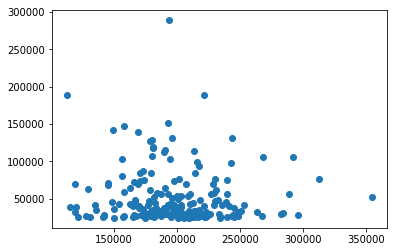

In [147]:
plt.scatter(df_Q1['Duration'], df_Q1['Streams'])
plt.show()

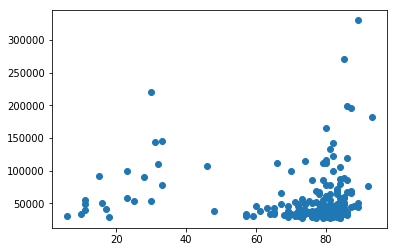

In [148]:
plt.scatter(df_Q2['Popularity'], df_Q2['Streams'])
plt.show()

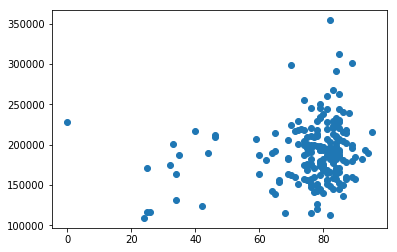

In [149]:
plt.scatter(df_Q3['Popularity'], df_Q3['Duration'])
plt.show()

In [150]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_Q2['Popularity'], df_Q2['Streams'])
rvalue

-0.03302907739517839

## Functions To Be Used In Analysis

In [151]:
def do_correlation(df, var1, var2):
    correlation = stats.pearsonr(df[var1],df[var2])
    
    print(f"{df.name}: The correlation between {var1} and {var2} is {round(correlation[0],2)}")

# Danceability Analysis

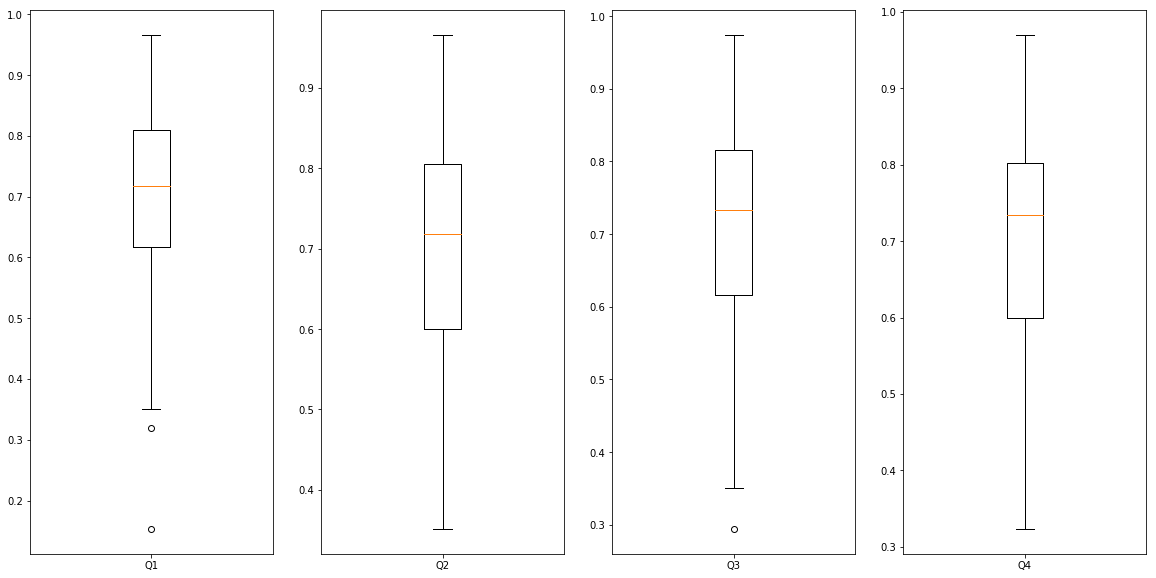

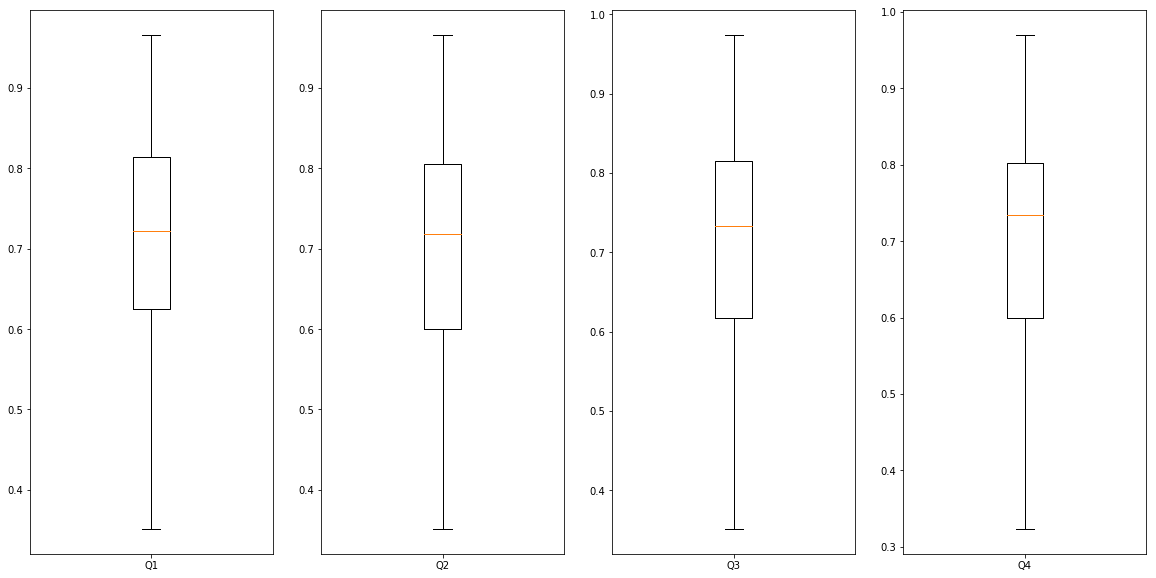

In [152]:
## finding outliers and cleaning up

fig1, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

for axis,dframe in zip(axs,quart_df_list):
    axis.boxplot(dframe['Danceability'])

for axis,quarters in zip(axs,quarter_names):
    plt.setp(axis,xticklabels=[quarters])

#Removing Outliers and creating new data frames for danceability and creating a new box plot
dance_q1=df_Q1[(df_Q1['Danceability']>0.35)]
dance_q2=df_Q2
dance_q3=df_Q3[(df_Q3['Danceability']>0.3)]
dance_q4=df_Q4

fig2, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

ax1.boxplot(dance_q1['Danceability'])
ax2.boxplot(dance_q2['Danceability'])
ax3.boxplot(dance_q3['Danceability'])
ax4.boxplot(dance_q4['Danceability'])
for axis,quarters in zip(axs,quarter_names):
    plt.setp(axis,xticklabels=[quarters])


plt.show()

### Finding any possible correlation between dancibility and popularity

The correlation coefficient between Q1 Danceability and Popularity is -0.08
The correlation coefficient between Q2 Danceability and Popularity is -0.1
The correlation coefficient between Q3 Danceability and Popularity is 0.02
The correlation coefficient between Q4 Danceability and Popularity is 0.0


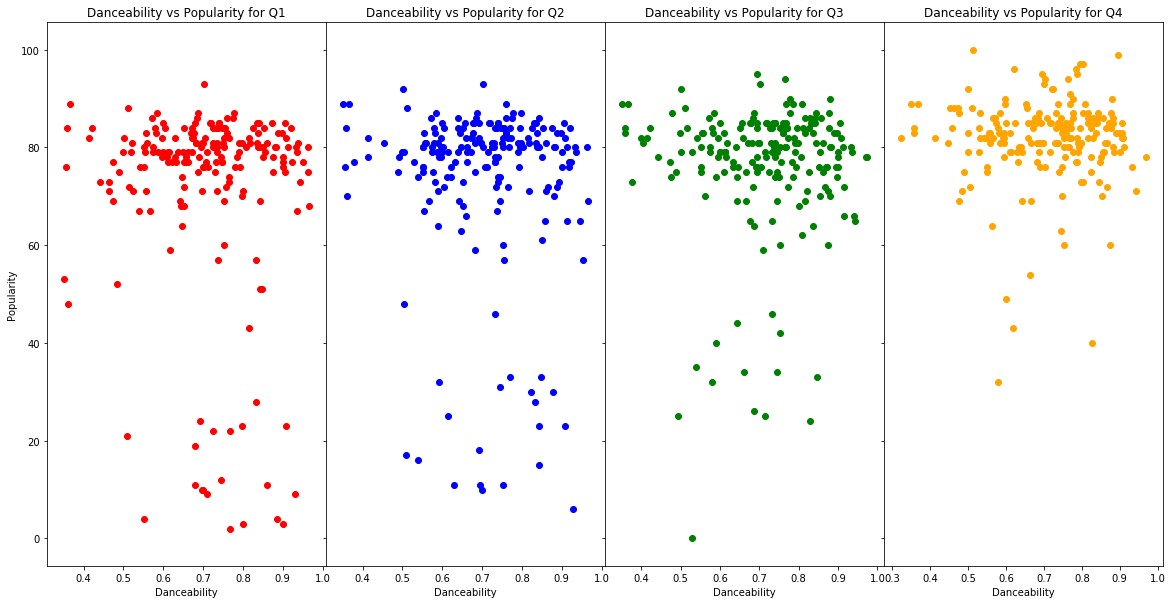

In [153]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(dance_q1['Danceability'], dance_q1['Popularity'],color='red')
ax2.scatter(dance_q2['Danceability'], dance_q2['Popularity'],color='blue')
ax3.scatter(dance_q3['Danceability'], dance_q3['Popularity'],color='green')
ax4.scatter(dance_q4['Danceability'], dance_q4['Popularity'],color='orange')

ax1.set_title('Danceability vs Popularity for Q1')
ax2.set_title('Danceability vs Popularity for Q2')
ax3.set_title('Danceability vs Popularity for Q3')
ax4.set_title('Danceability vs Popularity for Q4')

for label in axs:
    label.set_xlabel('Danceability')

ax1.set_ylabel('Popularity')

print(f"The correlation coefficient between Q1 Danceability and Popularity is {round(pearsonr(dance_q1['Danceability'],dance_q1['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q2 Danceability and Popularity is {round(pearsonr(dance_q2['Danceability'],dance_q2['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q3 Danceability and Popularity is {round(pearsonr(dance_q3['Danceability'],dance_q3['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q4 Danceability and Popularity is {round(pearsonr(dance_q4['Danceability'],dance_q4['Popularity'])[0],2)}")

### Finding any possible correlation between dancibility and steams

The correlation coefficient between Q1 Danceability and Streams is 0.12
The correlation coefficient between Q2 Danceability and Streams is 0.14
The correlation coefficient between Q3 Danceability and Streams is 0.01
The correlation coefficient between Q4 Danceability and Streams is 0.01


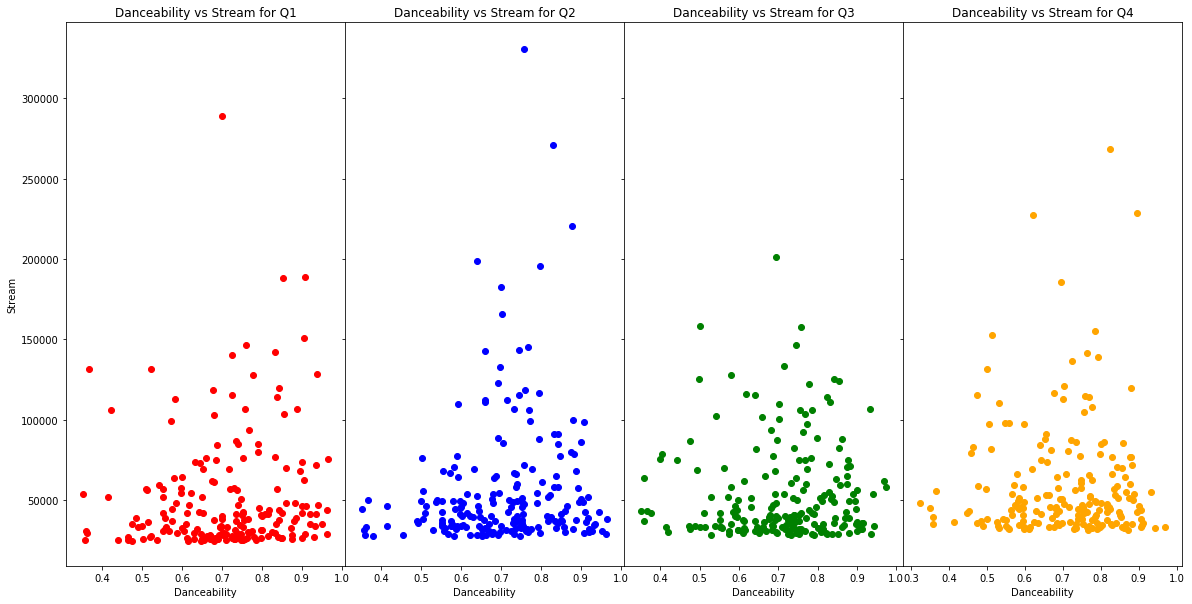

In [154]:

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

ax1.scatter(dance_q1['Danceability'], dance_q1['Streams'],color='red')
ax2.scatter(dance_q2['Danceability'], dance_q2['Streams'],color='blue')
ax3.scatter(dance_q3['Danceability'], dance_q3['Streams'],color='green')
ax4.scatter(dance_q4['Danceability'], dance_q4['Streams'],color='orange')

ax1.set_title('Danceability vs Stream for Q1')
ax2.set_title('Danceability vs Stream for Q2')
ax3.set_title('Danceability vs Stream for Q3')
ax4.set_title('Danceability vs Stream for Q4')


for label in axs:
    label.set_xlabel('Danceability')
ax1.set_ylabel('Stream')


print(f"The correlation coefficient between Q1 Danceability and Streams is {round(pearsonr(dance_q1['Danceability'],dance_q1['Streams'])[0],2)}")
print(f"The correlation coefficient between Q2 Danceability and Streams is {round(pearsonr(dance_q2['Danceability'],dance_q2['Streams'])[0],2)}")
print(f"The correlation coefficient between Q3 Danceability and Streams is {round(pearsonr(dance_q3['Danceability'],dance_q3['Streams'])[0],2)}")
print(f"The correlation coefficient between Q4 Danceability and Streams is {round(pearsonr(dance_q4['Danceability'],dance_q4['Streams'])[0],2)}")

#### Analyzing danceability bar charts

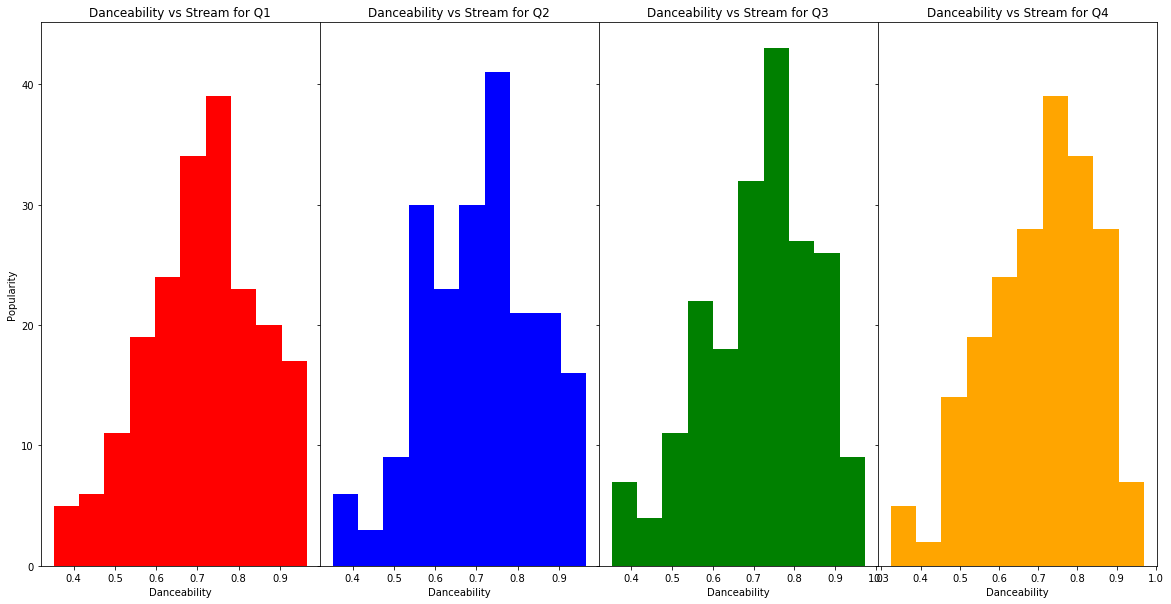

In [155]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

ax1.hist(dance_q1['Danceability'],color='red')
ax2.hist(dance_q2['Danceability'],color='blue')
ax3.hist(dance_q3['Danceability'],color='green')
ax4.hist(dance_q4['Danceability'],color='orange')

ax1.set_title('Danceability vs Stream for Q1')
ax2.set_title('Danceability vs Stream for Q2')
ax3.set_title('Danceability vs Stream for Q3')
ax4.set_title('Danceability vs Stream for Q4')

for label in axs:
    label.set_xlabel('Danceability')
    
ax1.set_ylabel('Popularity')

plt.show()


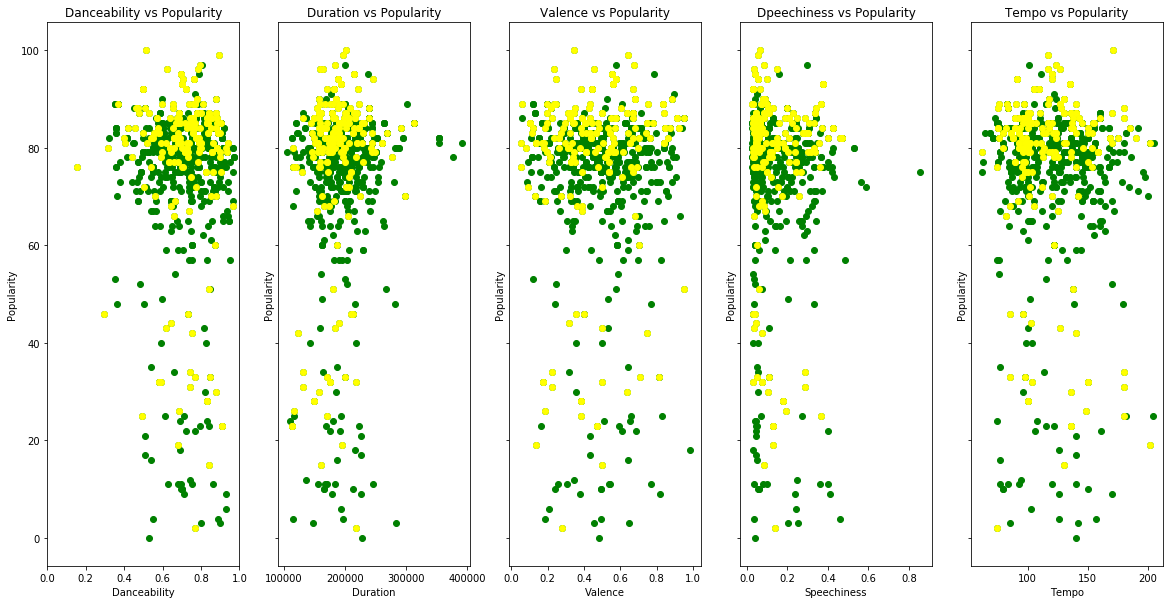

In [156]:
## finding top 50 tracks of each quarter and group them for the entire year

top_50_q1=df_Q1.head(50)
top_50_q2=df_Q2.head(50)
top_50_q3=df_Q3.head(50)
top_50_q4=df_Q4.head(50)
frames=[top_50_q1,top_50_q2,top_50_q3,top_50_q4]
top_50_year=pd.concat(frames)

#Combining all top 200 songs into one data frame for the entire year and take the list minus the first 50

frames_year=[df_Q1,df_Q2,df_Q3,df_Q4]
top_200_year=pd.concat(frames_year)

#Plotting data

fig2, axs = plt.subplots(1,5,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0.2},figsize=(20,10))
ax1, ax2, ax3, ax4, ax5 = axs

#Plotting Danceability versus Popularity
ax1.scatter(top_200_year['Danceability'], top_200_year['Popularity'],color='green')
ax1.scatter(top_50_year['Danceability'], top_50_year['Popularity'],color='yellow')
ax1.set_title('Danceability vs Popularity')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Popularity')
ax1.set_xlim(0,1)


#Plotting Duration versus Popularity
ax2.scatter(top_200_year['Duration'], top_200_year['Popularity'],color='green')
ax2.scatter(top_50_year['Duration'], top_50_year['Popularity'],color='yellow')
ax2.set_title('Duration vs Popularity')
ax2.set_xlabel('Duration')

ax3.scatter(top_200_year['Valence'], top_200_year['Popularity'],color='green')
ax3.scatter(top_50_year['Valence'], top_50_year['Popularity'],color='yellow')
ax3.set_title('Valence vs Popularity')
ax3.set_xlabel('Valence')

ax4.scatter(top_200_year['Speechiness'], top_200_year['Popularity'],color='green')
ax4.scatter(top_50_year['Speechiness'], top_50_year['Popularity'],color='yellow')
ax4.set_title('Dpeechiness vs Popularity')
ax4.set_xlabel('Speechiness')

ax5.scatter(top_200_year['Tempo'], top_200_year['Popularity'],color='green')
ax5.scatter(top_50_year['Tempo'], top_50_year['Popularity'],color='yellow')
ax5.set_title('Tempo vs Popularity')
ax5.set_xlabel('Tempo')


for label in axs:
    label.set_ylabel('Popularity')

plt.show()

In [157]:
#ANOVA for danceability for each quarter
group_dance_Q1 = df_Q1["Danceability"]
group_dance_Q2 = df_Q2["Danceability"]
group_dance_Q3 = df_Q3["Danceability"]
group_dance_Q4 = df_Q4["Danceability"]

f_oneway(group_dance_Q1,group_dance_Q2,group_dance_Q3,group_dance_Q4)


F_onewayResult(statistic=0.08490765223875946, pvalue=0.968284960476382)

#### Results shows that there is no statistically significant difference between Dacnceability amongst the 4 quarters 





In [158]:
#ANOVA for danceability for each quarter
f_oneway(group_dance_Q1,group_dance_Q1.head(50))

F_onewayResult(statistic=0.3205114707785049, pvalue=0.5718123547920076)

#### Results shows that there is no statistically significant difference between Dacnceability of first 50 songs of Q1 and the remainder of Q1




# Speechiness Analysis

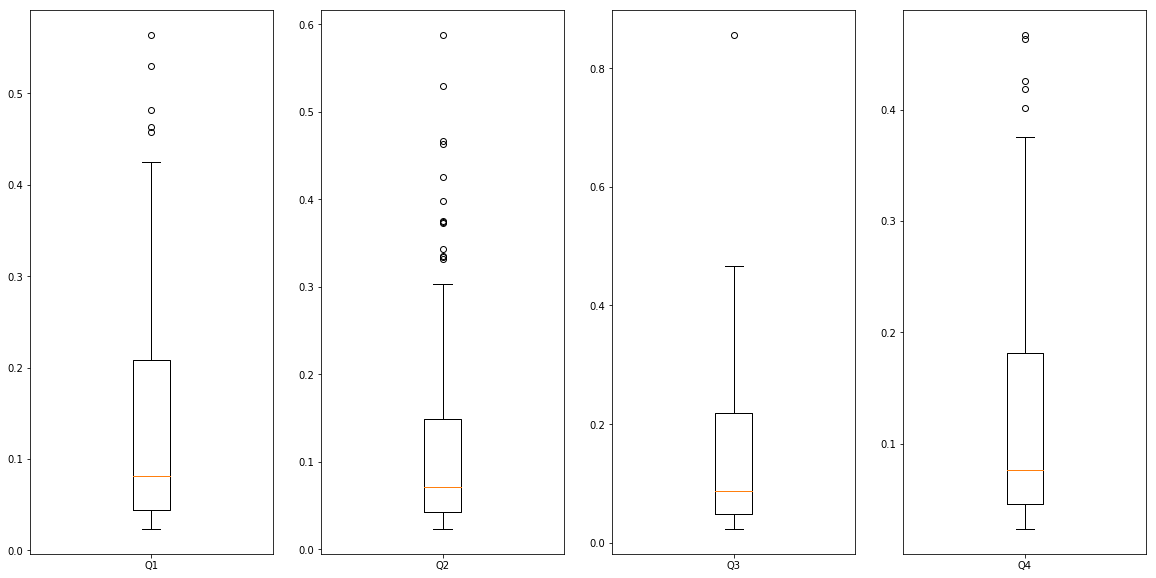

In [159]:
fig1, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

for axis,dframe in zip(axs,quart_df_list):
    axis.boxplot(dframe['Speechiness'])
    
for axis,quarters in zip(axs,quarter_names):
    plt.setp(axis,xticklabels=[quarters])

plt.show()

Q1: The correlation between Speechiness and Popularity is -0.13
Q2: The correlation between Speechiness and Popularity is 0.01
Q3: The correlation between Speechiness and Popularity is -0.02
Q4: The correlation between Speechiness and Popularity is 0.02


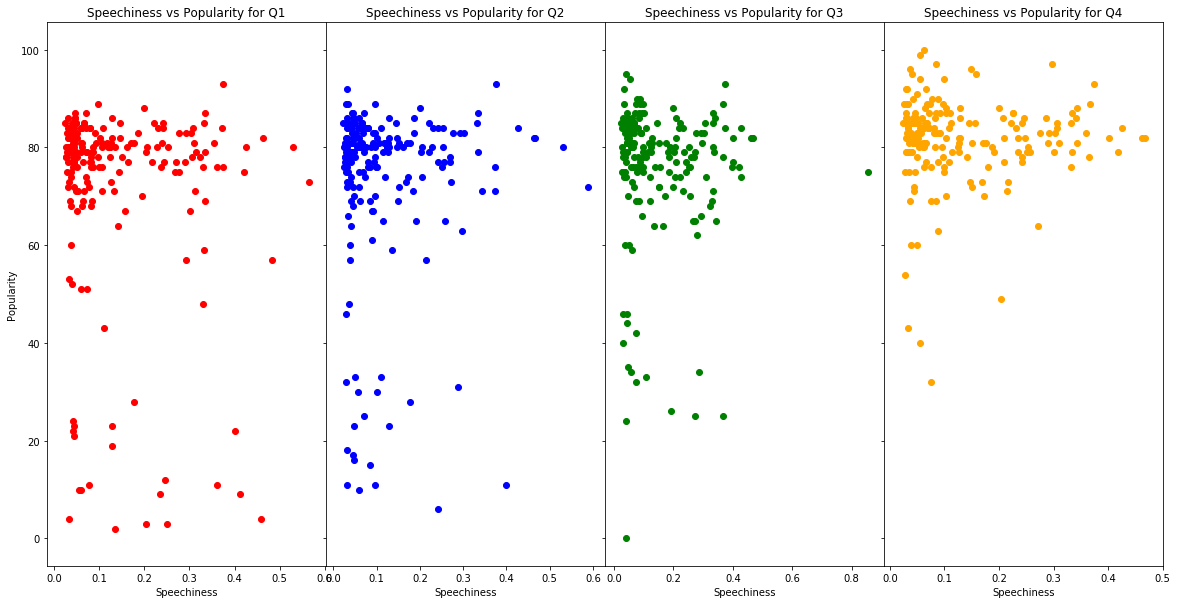

In [182]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Speechiness'], dataf['Popularity'],color=colors)


ax1.set_title('Speechiness vs Popularity for Q1')
ax2.set_title('Speechiness vs Popularity for Q2')
ax3.set_title('Speechiness vs Popularity for Q3')
ax4.set_title('Speechiness vs Popularity for Q4')


for label in axs:
    label.set_xlabel('Speechiness')
ax1.set_ylabel('Popularity')

for x in quart_df_list:
    do_correlation(x, 'Speechiness', 'Popularity')

Q1: The correlation between Speechiness and Valence is -0.02
Q2: The correlation between Speechiness and Valence is -0.05
Q3: The correlation between Speechiness and Valence is 0.17
Q4: The correlation between Speechiness and Valence is 0.04


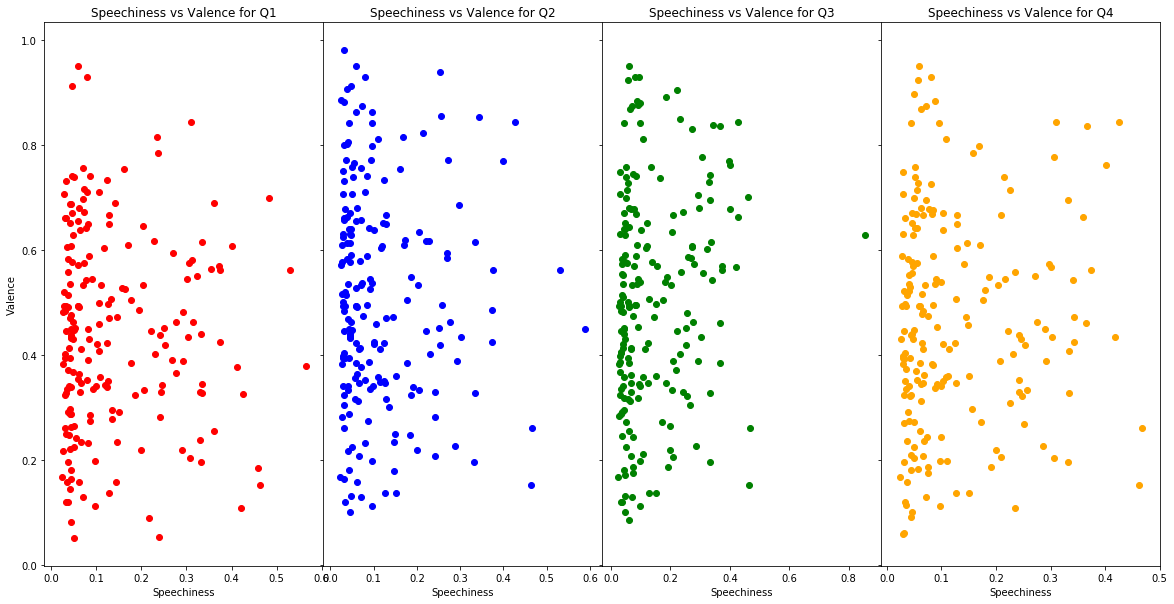

In [186]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Speechiness'], dataf['Valence'],color=colors)

ax1.set_title('Speechiness vs Valence for Q1')
ax2.set_title('Speechiness vs Valence for Q2')
ax3.set_title('Speechiness vs Valence for Q3')
ax4.set_title('Speechiness vs Valence for Q4')

for label in axs:
    label.set_xlabel('Speechiness')

ax1.set_ylabel('Valence')

for x in quart_df_list:
    do_correlation(x, 'Speechiness', 'Valence')

Q1: The correlation between Speechiness and Duration is -0.23
Q2: The correlation between Speechiness and Duration is -0.2
Q3: The correlation between Speechiness and Duration is -0.25
Q4: The correlation between Speechiness and Duration is -0.28


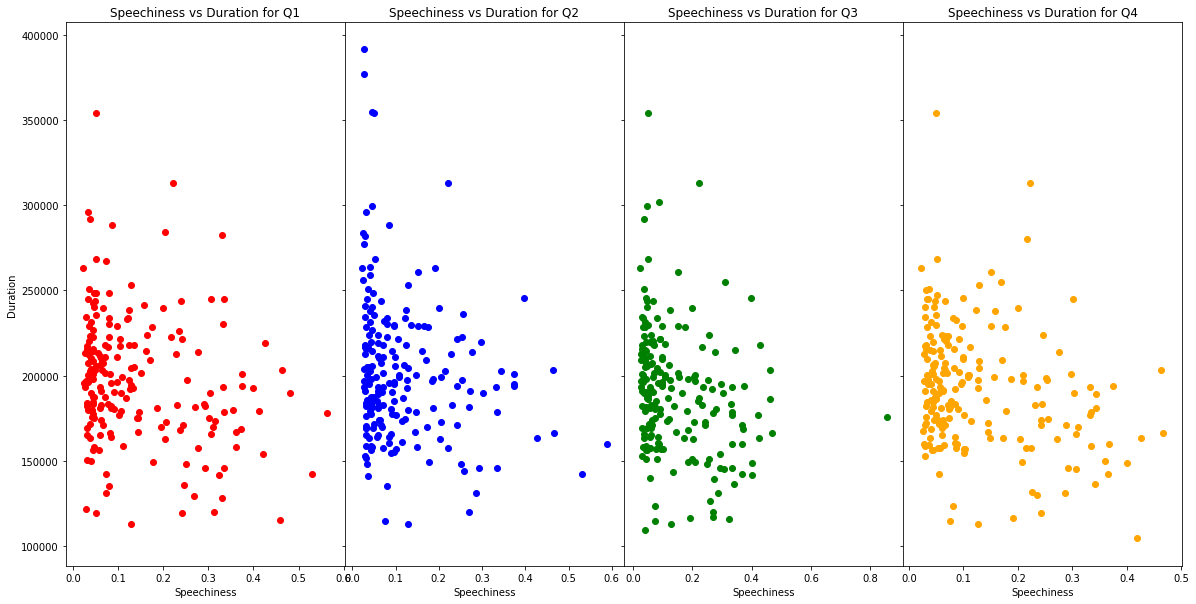

In [187]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Speechiness'], dataf['Duration'],color=colors)

ax1.set_title('Speechiness vs Duration for Q1')
ax2.set_title('Speechiness vs Duration for Q2')
ax3.set_title('Speechiness vs Duration for Q3')
ax4.set_title('Speechiness vs Duration for Q4')

for label in axs:
    label.set_xlabel('Speechiness')
ax1.set_ylabel('Duration')

for x in quart_df_list:
    do_correlation(x, 'Speechiness', 'Duration')


Q1: The correlation between Speechiness and Danceability is 0.35
Q2: The correlation between Speechiness and Danceability is 0.34
Q3: The correlation between Speechiness and Danceability is 0.24
Q4: The correlation between Speechiness and Danceability is 0.27


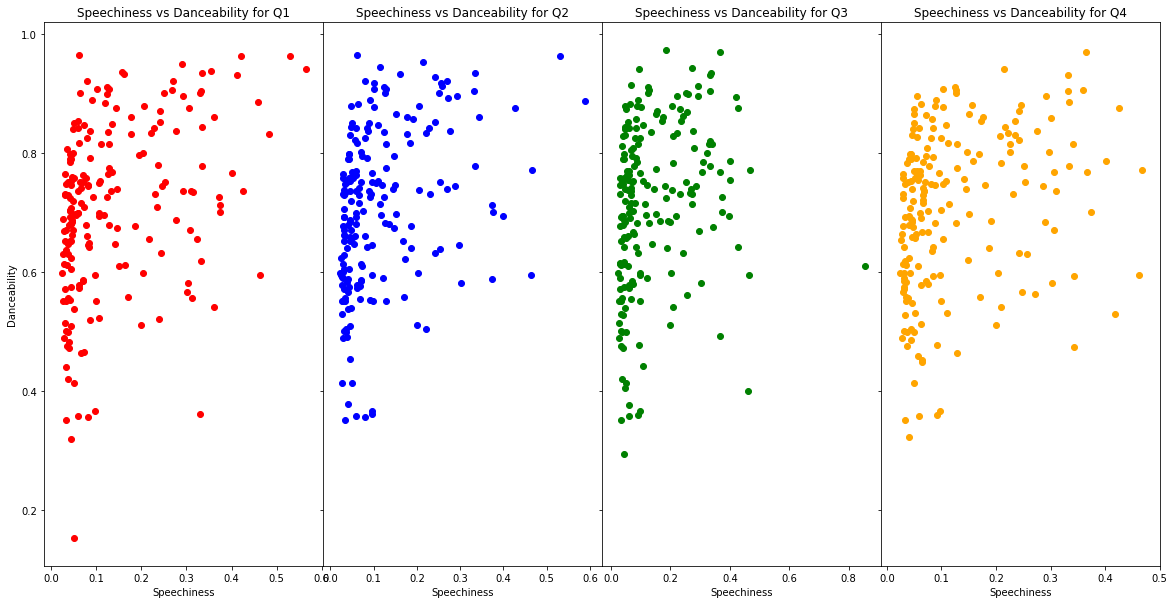

In [188]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Speechiness'], dataf['Danceability'],color=colors)


ax1.set_title('Speechiness vs Danceability for Q1')
ax2.set_title('Speechiness vs Danceability for Q2')
ax3.set_title('Speechiness vs Danceability for Q3')
ax4.set_title('Speechiness vs Danceability for Q4')

for label in axs:
    label.set_xlabel('Speechiness')
ax1.set_ylabel('Danceability')

for x in quart_df_list:
    do_correlation(x, 'Speechiness', 'Danceability')

Q1: The correlation between Speechiness and Streams is 0.17
Q2: The correlation between Speechiness and Streams is -0.01
Q3: The correlation between Speechiness and Streams is -0.02
Q4: The correlation between Speechiness and Streams is -0.07


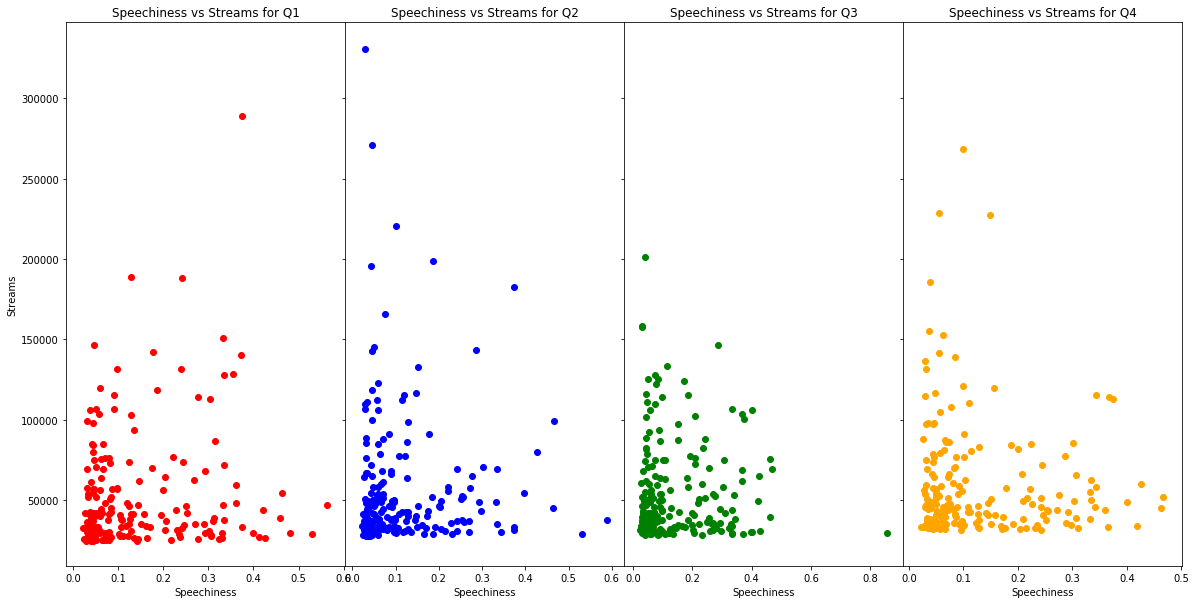

In [190]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Speechiness'], dataf['Streams'],color=colors)


ax1.set_title('Speechiness vs Streams for Q1')
ax2.set_title('Speechiness vs Streams for Q2')
ax3.set_title('Speechiness vs Streams for Q3')
ax4.set_title('Speechiness vs Streams for Q4')

for label in axs:
    label.set_xlabel('Speechiness')
ax1.set_ylabel('Streams')

for x in quart_df_list:
    do_correlation(x, 'Speechiness', 'Streams')

In [27]:
#ANOVA for Speechiness for each quarter
group_speech_Q1 = df_Q1["Speechiness"]
group_speech_Q2 = df_Q2["Speechiness"]
group_speech_Q3 = df_Q3["Speechiness"]
group_speech_Q4 = df_Q4["Speechiness"]

f_oneway(group_speech_Q1,group_speech_Q2,group_speech_Q3,group_speech_Q4)


F_onewayResult(statistic=2.2297619517309726, pvalue=0.08335865914750178)

#### Results shows that there is no statistically significant difference between Speechiness amongst the 4 quarters

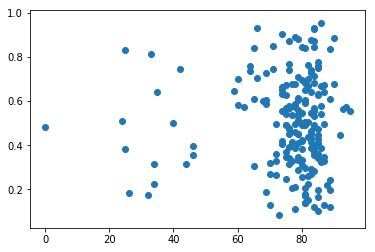

In [28]:
plt.scatter(df_Q3['Popularity'], df_Q3['Valence'])
plt.show()

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_Q2['Popularity'], df_Q2['Valence'])
rvalue

-0.06330334643802717

# Valence and Popularity

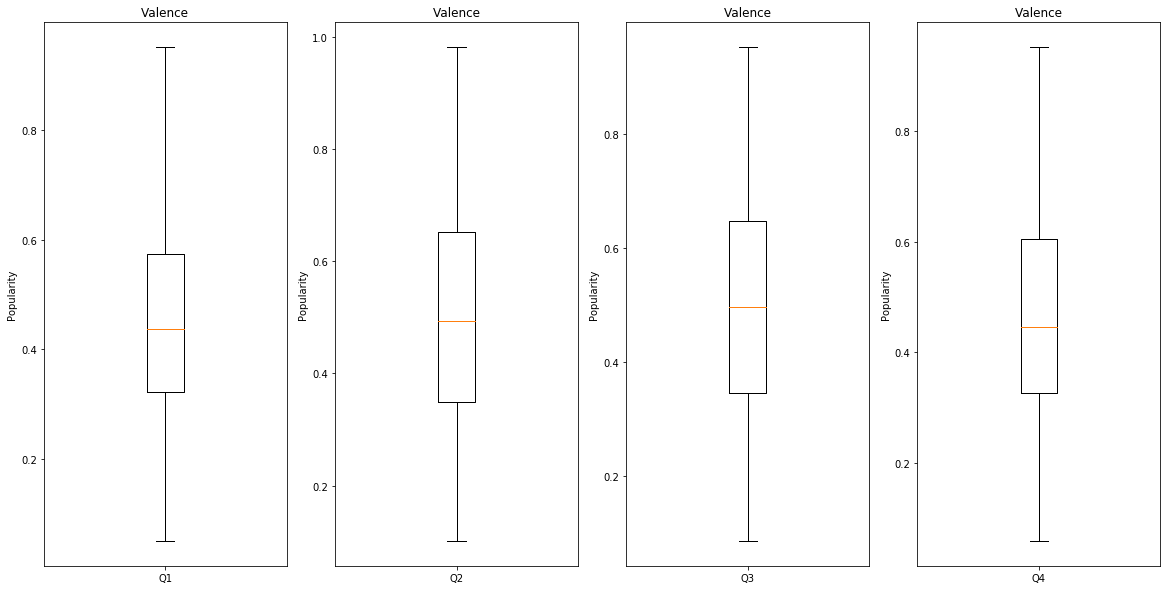

In [241]:

## finding outliers and cleaning up

fig1, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

for axis,dframe in zip(axs,quart_df_list):
    axis.boxplot(dframe['Valence'])

for label in axs:
    label.set_ylabel('Popularity') 
    label.set_title('Valence') 
     

for axis,quarters in zip(axs,quarter_names):
    plt.setp(axis,xticklabels=[quarters])
plt.show()



#### Finding any possible correlation between Valence and popularity

Q1: The correlation between Valence and Popularity is 0.0
Q2: The correlation between Valence and Popularity is -0.06
Q3: The correlation between Valence and Popularity is 0.0
Q4: The correlation between Valence and Popularity is 0.05


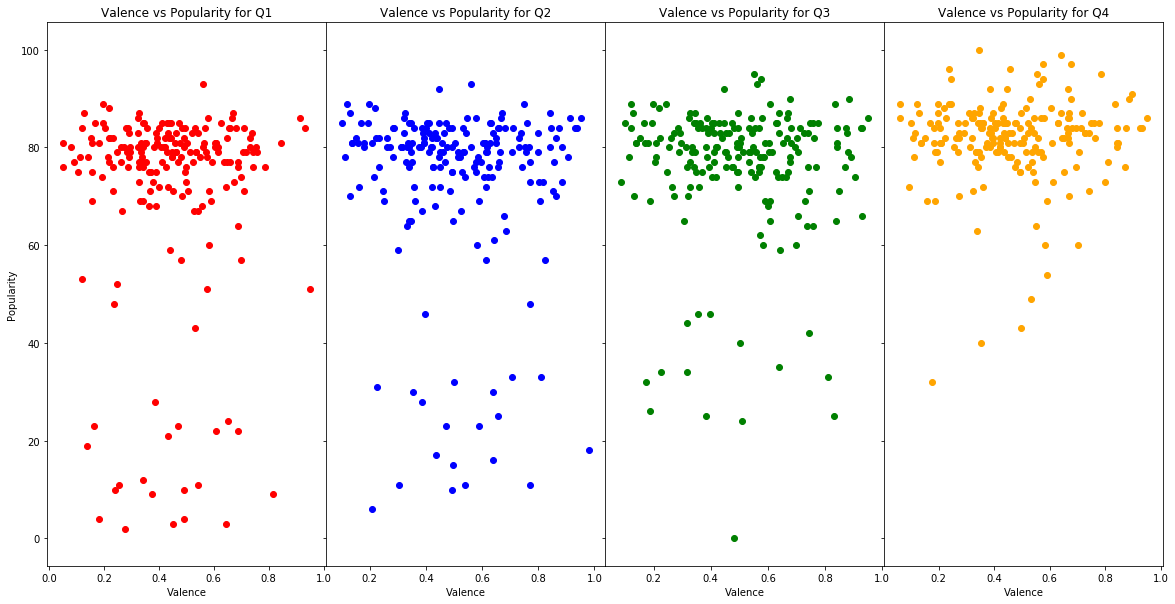

In [197]:


fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Valence'], dataf['Popularity'],color=colors)

ax1.set_title('Valence vs Popularity for Q1')
ax2.set_title('Valence vs Popularity for Q2')
ax3.set_title('Valence vs Popularity for Q3')
ax4.set_title('Valence vs Popularity for Q4')

for label in axs:
    label.set_xlabel("Valence")
ax1.set_ylabel('Popularity')

for x in quart_df_list:
    do_correlation(x, 'Valence', 'Popularity')

#### Finding any possible correlation between Valence and Tempo

Q1: The correlation between Valence and Tempo is -0.0
Q2: The correlation between Valence and Tempo is 0.0
Q3: The correlation between Valence and Tempo is 0.04
Q4: The correlation between Valence and Tempo is -0.06


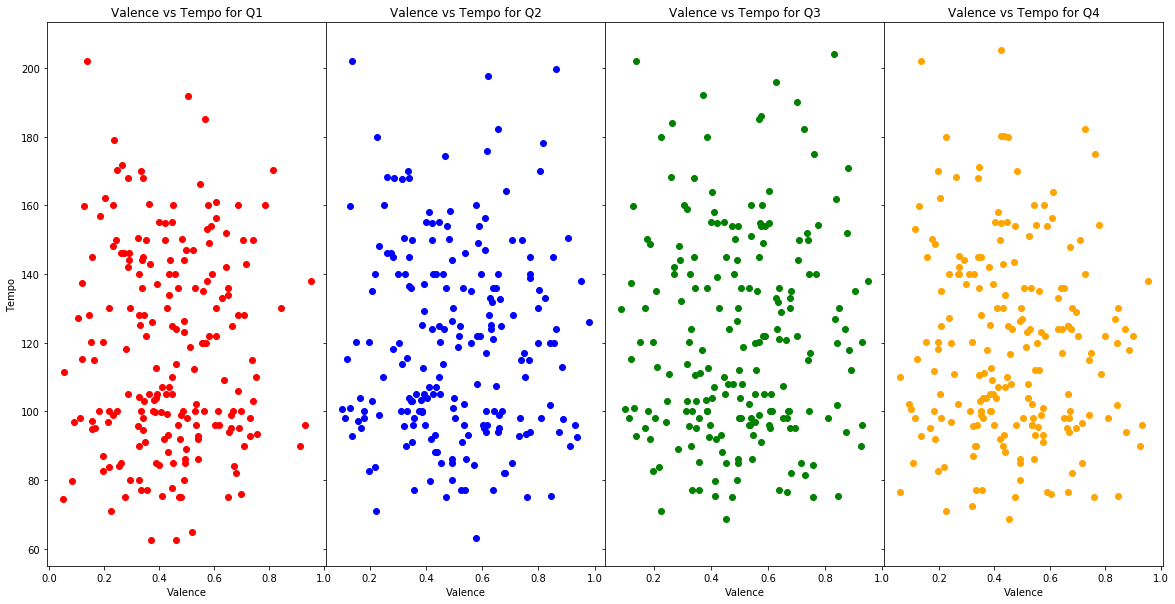

In [201]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Valence'], dataf['Tempo'],color=colors)



ax1.set_title('Valence vs Tempo for Q1')
ax2.set_title('Valence vs Tempo for Q2')
ax3.set_title('Valence vs Tempo for Q3')
ax4.set_title('Valence vs Tempo for Q4')

for label in axs:
    label.set_xlabel('Valence')
ax1.set_ylabel('Tempo')


for x in quart_df_list:
    do_correlation(x, 'Valence', 'Tempo')

#### Finding any possible correlation between Valence and Streams

Q1: The correlation between Valence and Streams is -0.07
Q2: The correlation between Valence and Streams is -0.02
Q3: The correlation between Valence and Streams is -0.02
Q4: The correlation between Valence and Streams is 0.03


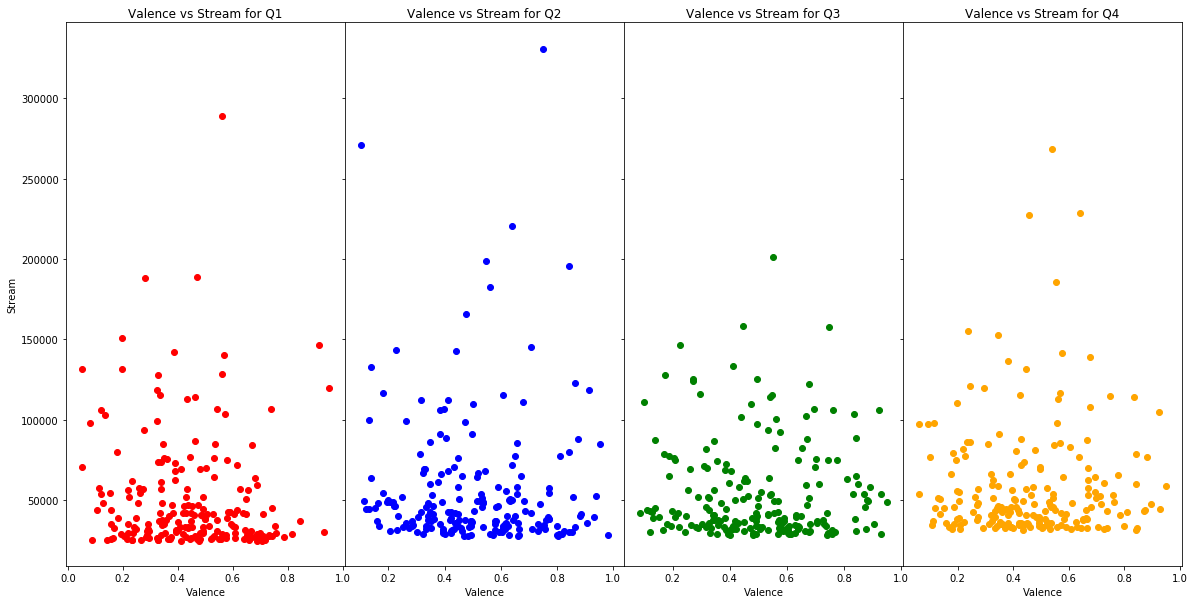

In [240]:

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Valence'], dataf['Streams'],color=colors)


ax1.set_title('Valence vs Stream for Q1')
ax2.set_title('Valence vs Stream for Q2')
ax3.set_title('Valence vs Stream for Q3')
ax4.set_title('Valence vs Stream for Q4')

for label in axs:
    label.set_xlabel('Valence')
ax1.set_ylabel('Stream')

for x in quart_df_list:
    do_correlation(x, 'Valence', 'Streams')

#### Finding any possible correlation between Valence and Danceability 

Q1: The correlation between Valence and Danceability is 0.24
Q2: The correlation between Valence and Danceability is 0.05
Q3: The correlation between Valence and Danceability is 0.35
Q4: The correlation between Valence and Danceability is 0.3


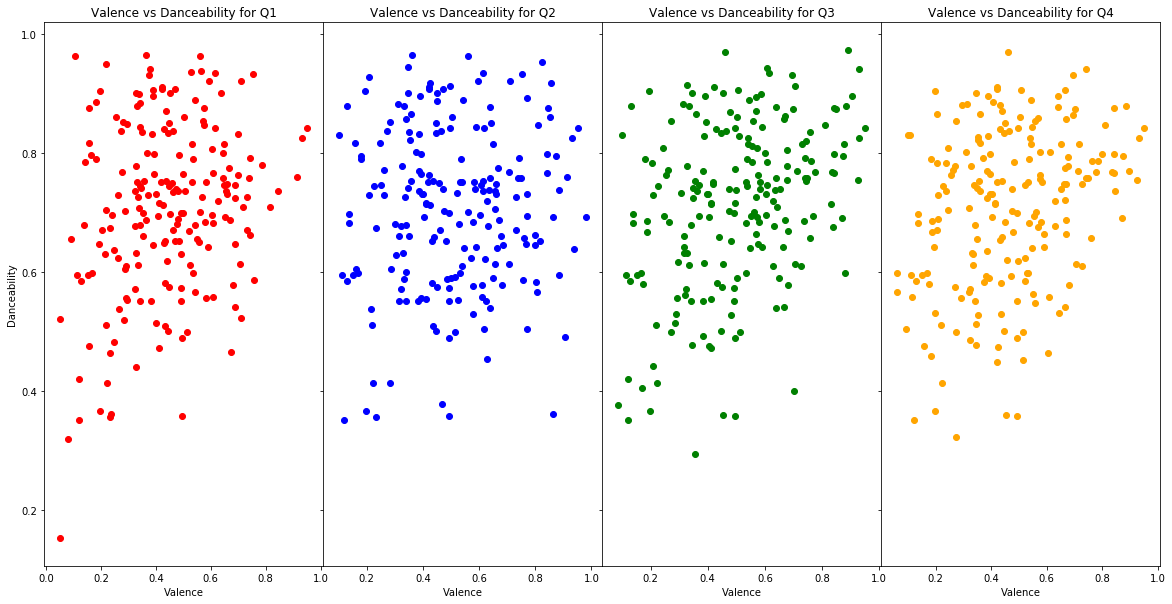

In [206]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Valence'], dataf['Danceability'],color=colors)


ax1.set_title('Valence vs Danceability for Q1')
ax2.set_title('Valence vs Danceability for Q2')
ax3.set_title('Valence vs Danceability for Q3')
ax4.set_title('Valence vs Danceability for Q4')

for label in axs:
    label.set_xlabel('Valence')
ax1.set_ylabel('Danceability')

for x in quart_df_list:
    do_correlation(x, 'Valence', 'Danceability')

#### Finding any possible correlation between Valence and Duration 

Q1: The correlation between Valence and Duration is -0.07
Q2: The correlation between Valence and Duration is -0.05
Q3: The correlation between Valence and Duration is -0.23
Q4: The correlation between Valence and Duration is -0.12


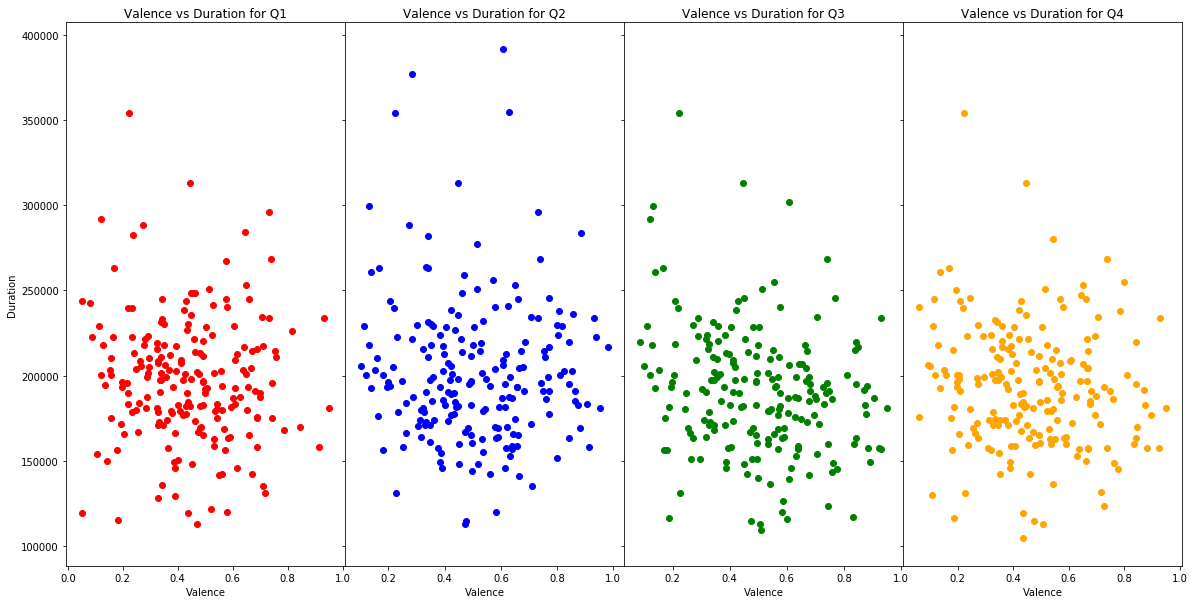

In [209]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Valence'], dataf['Duration'],color=colors)

ax1.set_title('Valence vs Duration for Q1')
ax2.set_title('Valence vs Duration for Q2')
ax3.set_title('Valence vs Duration for Q3')
ax4.set_title('Valence vs Duration for Q4')

for label in axs:
    label.set_xlabel('Valence')
ax1.set_ylabel('Duration')

for x in quart_df_list:
    do_correlation(x, 'Valence', 'Duration')

#### Analyzing danceability bar charts

[]

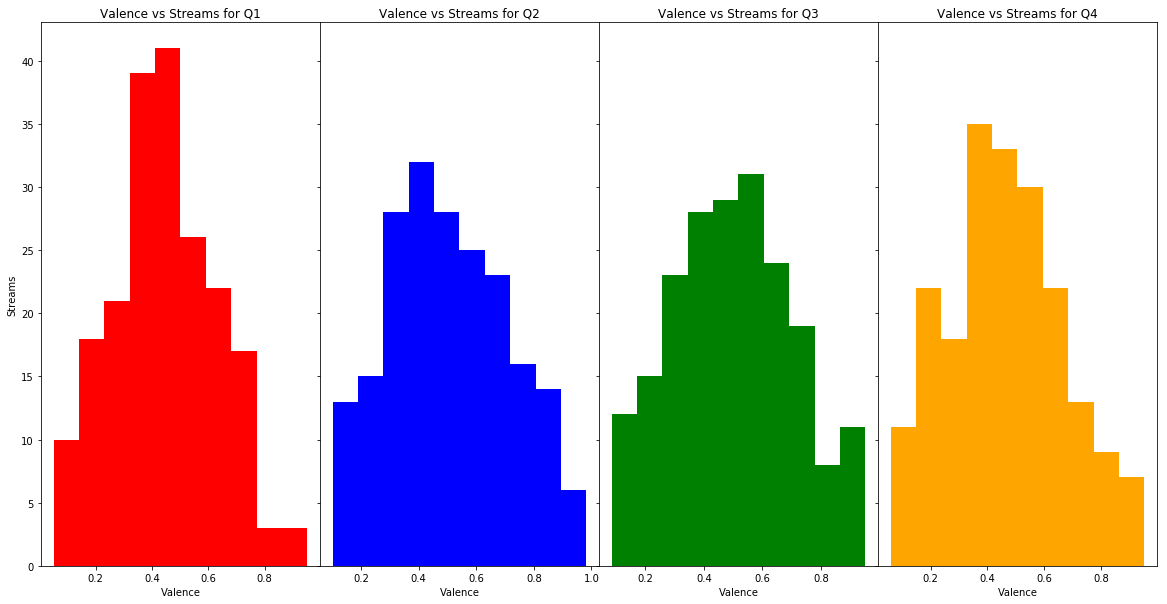

In [238]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
       axis.hist(dataf['Valence'],color=colors)

ax1.set_title('Valence vs Streams for Q1')
ax2.set_title('Valence vs Streams for Q2')
ax3.set_title('Valence vs Streams for Q3')
ax4.set_title('Valence vs Streams for Q4')

for label in axs:
    label.set_xlabel('Valence')
ax1.set_ylabel('Streams')

plt.plot()

In [37]:
#ANOVA for Valence for each quarter
Valence_dance_Q1 = df_Q1["Valence"]
Valence_dance_Q2 = df_Q2["Valence"]
Valence_dance_Q3 = df_Q3["Valence"]
Valence_dance_Q4 = df_Q4["Valence"]

f_oneway(Valence_dance_Q1,Valence_dance_Q2,Valence_dance_Q3,Valence_dance_Q4)


F_onewayResult(statistic=4.860108563926755, pvalue=0.0023442038237384186)

## With a Pvalue of 0.0023 Results shows that there is a statistically significant difference between Valence amongst the 4 quarters

# Tempo Analysis

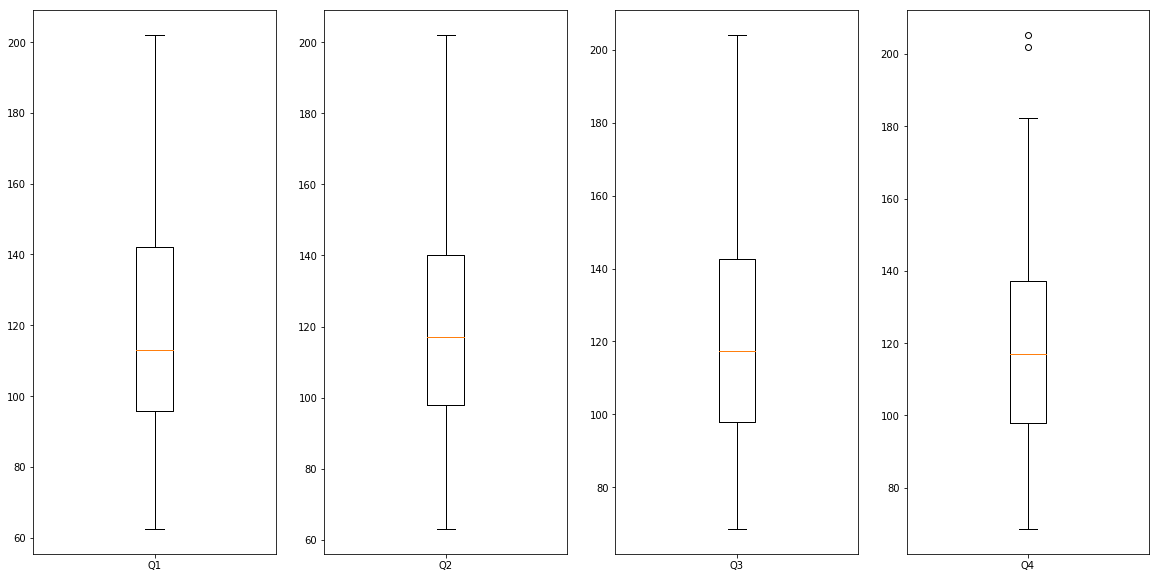

In [216]:
fig1, axs = plt.subplots(1,4,figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

for axis,dframe in zip(axs,quart_df_list):
    axis.boxplot(dframe['Tempo'])

for axis,quarters in zip(axs,quarter_names):
    plt.setp(axis,xticklabels=[quarters])

plt.show()

In [39]:
Q1_tempo_summary=df_Q1['Tempo'].describe()
Q2_tempo_summary=df_Q2['Tempo'].describe()
Q3_tempo_summary=df_Q3['Tempo'].describe()
Q4_tempo_summary=df_Q4['Tempo'].describe()
dff=[Q1_tempo_summary,Q2_tempo_summary,Q3_tempo_summary,Q4_tempo_summary]
Tempo_summary_df=pd.DataFrame(dff, index=(["Q1","Q2","Q3","Q4"]))
Tempo_summary_df

,count,mean,std,min,25%,50%,75%,max
Q1,200.0,117.806420,29.191265,62.446,95.66575,113.1580,142.21050,202.006
Q2,200.0,119.556690,28.182540,63.050,97.91125,116.9625,140.02200,202.015
Q3,200.0,120.992890,30.047519,68.534,97.98550,117.4550,142.53925,204.096
Q4,200.0,118.938155,27.882898,68.534,97.97525,116.9690,137.21700,205.272


### Mean Analysis of variables 

In [41]:
Quarters_mean_summary={"Streams":{"Q1":df_Q1['Streams'].mean(),"Q2":df_Q2['Streams'].mean(),"Q3":df_Q3['Streams'].mean(),"Q4":df_Q4['Streams'].mean()},
                "Tempo":{"Q1":df_Q1['Tempo'].mean(),"Q2":df_Q2['Tempo'].mean(),"Q3":df_Q3['Tempo'].mean(),"Q4":df_Q4['Tempo'].mean()},
                "Valence":{"Q1":df_Q1['Valence'].mean(),"Q2":df_Q2['Valence'].mean(),"Q3":df_Q3['Valence'].mean(),"Q4":df_Q4['Valence'].mean()},
                "Speechiness":{"Q1":df_Q1['Speechiness'].mean(),"Q2":df_Q2['Speechiness'].mean(),"Q3":df_Q3['Speechiness'].mean(),"Q4":df_Q4['Speechiness'].mean()},
                "Danceability":{"Q1":df_Q1['Danceability'].mean(),"Q2":df_Q2['Danceability'].mean(),"Q3":df_Q3['Danceability'].mean(),"Q4":df_Q4['Danceability'].mean()}}
pd.DataFrame(Quarters_mean_summary)

,Streams,Tempo,Valence,Speechiness,Danceability
Q1,51413.46,117.806420,0.441819,0.137655,0.705750
Q2,56983.13,119.556690,0.508215,0.116193,0.706060
Q3,54346.11,120.992890,0.501311,0.143260,0.711440
Q4,58987.33,118.938155,0.463131,0.124981,0.705295


### Finding any possible correlation between Tempo and Popularity



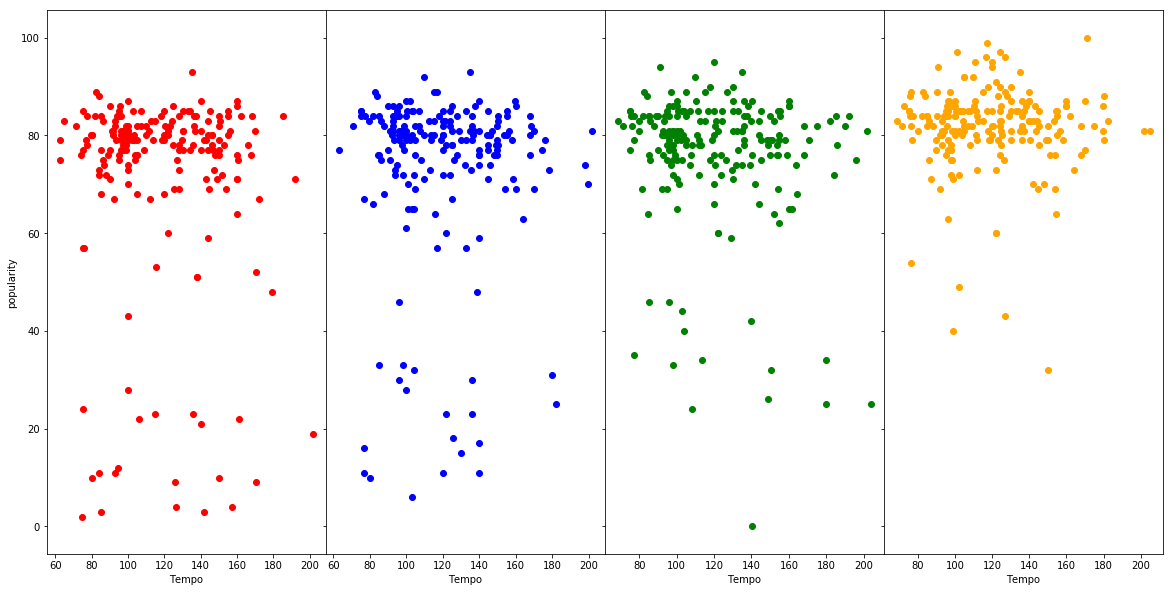

In [219]:

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

for axis, dataf, colors in zip(axs,quart_df_list,color):
    axis.scatter(dataf['Tempo'], dataf['Popularity'],color=colors)
    
for label in axs:
    label.set_xlabel('Tempo')
ax1.set_ylabel("popularity")

plt.show()

### Tempo Vs Popularity

In [221]:
for x in quart_df_list:
    do_correlation(x, 'Tempo', 'Popularity')

Q1: The correlation between Tempo and Popularity is -0.07
Q2: The correlation between Tempo and Popularity is -0.01
Q3: The correlation between Tempo and Popularity is -0.14
Q4: The correlation between Tempo and Popularity is -0.01


### Tempo vs Duration

In [222]:
for x in quart_df_list:
    do_correlation(x, 'Tempo', 'Duration')


Q1: The correlation between Tempo and Duration is 0.1
Q2: The correlation between Tempo and Duration is 0.0
Q3: The correlation between Tempo and Duration is -0.15
Q4: The correlation between Tempo and Duration is -0.1


### Average Tempo in Quarters

In [226]:
print(f'The average tempo of bottom 50 songs vs top 50 songs in Q1 {round(Q1_b50_df.Tempo.mean(),4)} vs {round(Q1_t50_df.Tempo.mean(),4)}')

print(f'The average tempo of bottom 50 songs vs top 50 songs in Q2 {round(Q2_b50_df.Tempo.mean(),4)} vs {round(Q2_t50_df.Tempo.mean(),4)}')

print(f'The average tempo of bottom 50 songs vs top 50 songs in Q3 {round(Q3_b50_df.Tempo.mean(),4)} vs {round(Q3_t50_df.Tempo.mean(),4)}')

print(f'The average tempo of bottom 50 songs vs top 50 songs in Q4 {Q4_b50_df.Tempo.mean()} vs {Q4_t50_df.Tempo.mean()}')

The average tempo of bottom 50 songs vs top 50 songs in Q1 115.9715 vs 115.9733
The average tempo of bottom 50 songs vs top 50 songs in Q2 128.1745 vs 113.7046
The average tempo of bottom 50 songs vs top 50 songs in Q3 121.3086 vs 120.3106
The average tempo of bottom 50 songs vs top 50 songs in Q4 120.53556 vs 118.87192


In [64]:
print(f'Pvalue for overall tempo 2019 is {round(f_oneway(df_Q1.Tempo,df_Q2.Tempo,df_Q3.Tempo,df_Q4.Tempo)[1],4)}')

Pvalue for overall tempo 2019 is 0.7357


# Duration Analysis

In [65]:
stats.f_oneway(df_Q1['Duration'], df_Q2['Duration'], df_Q3['Duration'], df_Q4['Duration'])

F_onewayResult(statistic=3.431485492240734, pvalue=0.016671608840744513)

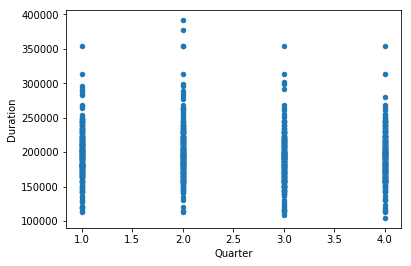

In [66]:
merged_df.plot.scatter(y='Duration', x='Quarter')

In [67]:
duration_quarters = merged_df.groupby('Quarter').mean()
duration_quarters.head()

,Duration,Popularity,Tempo,Valence,Speechiness,Danceability,Streams
Quarter,,,,,,,
1,197677.160,71.175,117.806420,0.441819,0.137655,0.705750,51413.46
2,201676.830,72.990,119.556690,0.508215,0.116193,0.706060,56983.13
3,190320.195,75.960,120.992890,0.501311,0.143260,0.711440,54346.11
4,193037.090,81.615,118.938155,0.463131,0.124981,0.705295,58987.33


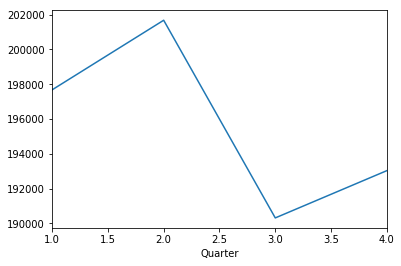

In [76]:
duration_quarters['Duration'].plot()
plt.show()

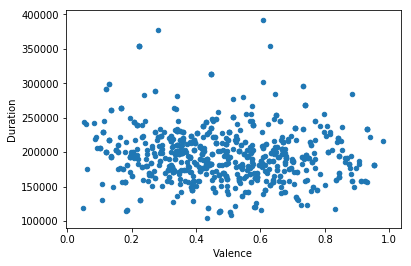

In [75]:
merged_df.plot.scatter(y='Duration', x='Valence')
plt.show()

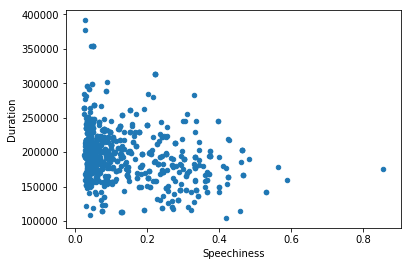

In [74]:
merged_df.plot.scatter(y='Duration', x='Speechiness')
plt.show()

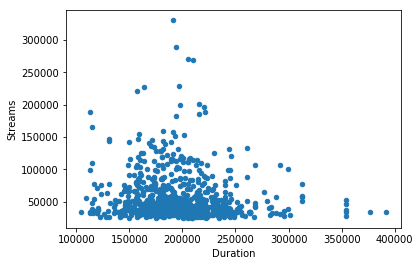

In [73]:
merged_df.plot.scatter(x='Duration', y='Streams')
plt.show()

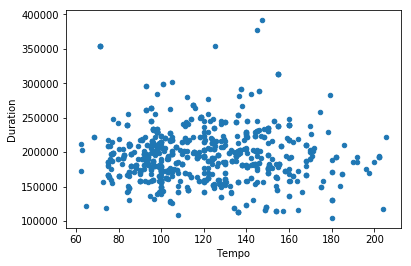

In [77]:
merged_df.plot.scatter(y='Duration', x='Tempo')
plt.show()

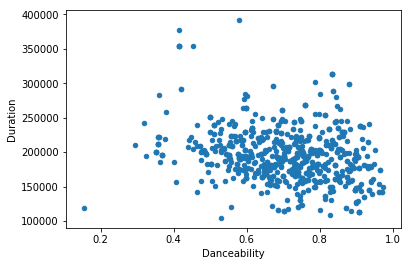

In [79]:
merged_df.plot.scatter(y='Duration', x='Danceability')
plt.show()

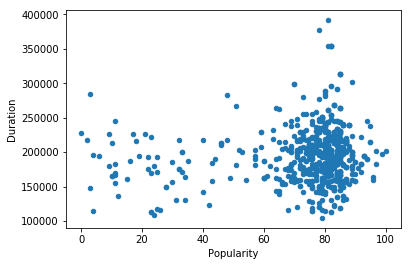

In [80]:
merged_df.plot.scatter(y='Duration', x='Popularity')
plt.show()

In [81]:
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Valence'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Danceability'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Tempo'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Speechiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
correlation = stats.pearsonr(merged_df['Duration'],merged_df['Popularity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.11
The correlation between both factors is -0.25
The correlation between both factors is -0.04
The correlation between both factors is -0.24
The correlation between both factors is 0.12


In [227]:
print(f"Relationship between Duration and Valence across quarters")

for x in quart_df_list:
    do_correlation(x, 'Duration', 'Valence')

Relationship between Duration and Valence across quarters
Q1: The correlation between Duration and Valence is -0.07
Q2: The correlation between Duration and Valence is -0.05
Q3: The correlation between Duration and Valence is -0.23
Q4: The correlation between Duration and Valence is -0.12
